<a href="https://colab.research.google.com/github/ERTHINENI-BHAVYA-SREE/EDA_DA1/blob/main/Bhavyada1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:- E.BHAVYA SREE

REG NO:-21BDS0116

EDA THEORY DA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving constituents.csv to constituents.csv


In [ ]:
import pandas as pd  # Import pandas

# Load the dataset
data = pd.read_csv(next(iter(uploaded)))

Module 2: Data Transformation

Tasks: Handle Missing Values, Replace Values, Deduplication, Discretization

In [ ]:
import pandas as pd

# Load the dataset
dataset = data.copy()

# 1. Handling missing values (Not required as the dataset has no missing values)

# 2. Deduplication (General practice, but no duplicates are apparent in this dataset)
dataset = dataset.drop_duplicates()

# 3. Discretization/Binning
# Example: Binning the `CIK` column into ranges (categorizing by arbitrary groupings for demonstration)
cik_bins = [0, 50000, 100000, 1500000, dataset['CIK'].max()]
cik_labels = ['Small', 'Medium', 'Large', 'Very Large']
dataset['CIK_Category'] = pd.cut(dataset['CIK'], bins=cik_bins, labels=cik_labels)

# 4. Parsing `Date added` to extract year for additional analysis
dataset['Year_added'] = pd.to_datetime(dataset['Date added']).dt.year

# Preview dataset after transformation
print(dataset.head())


  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded CIK_Category  Year_added  
0    66740         1902       Medium        1957  
1    91142         1916       Medium        2017  
2     1800         1888        Small        1957  
3  15511

Module 3: Correlation Analysis

Tasks: Univariate, Bivariate, Multivariate Analysis

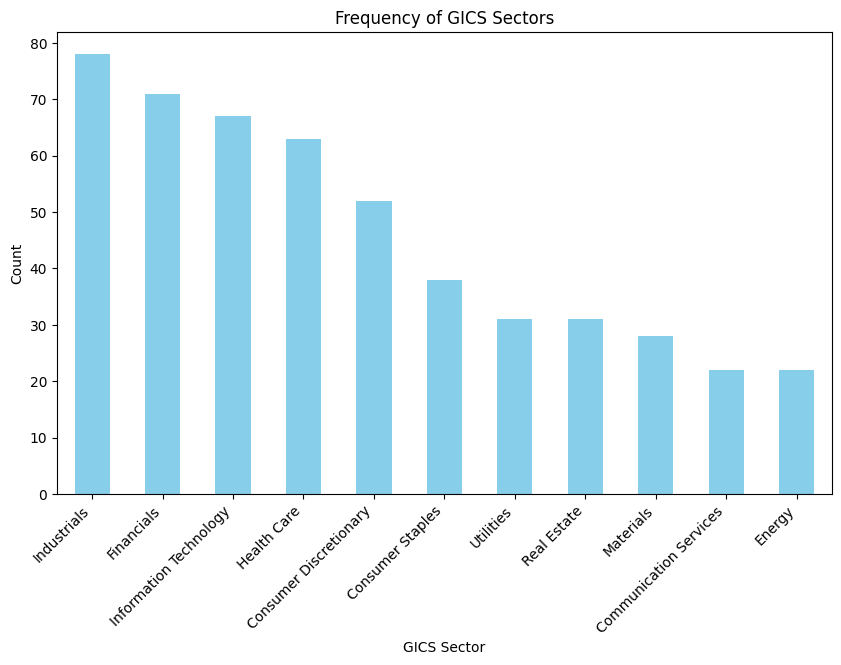

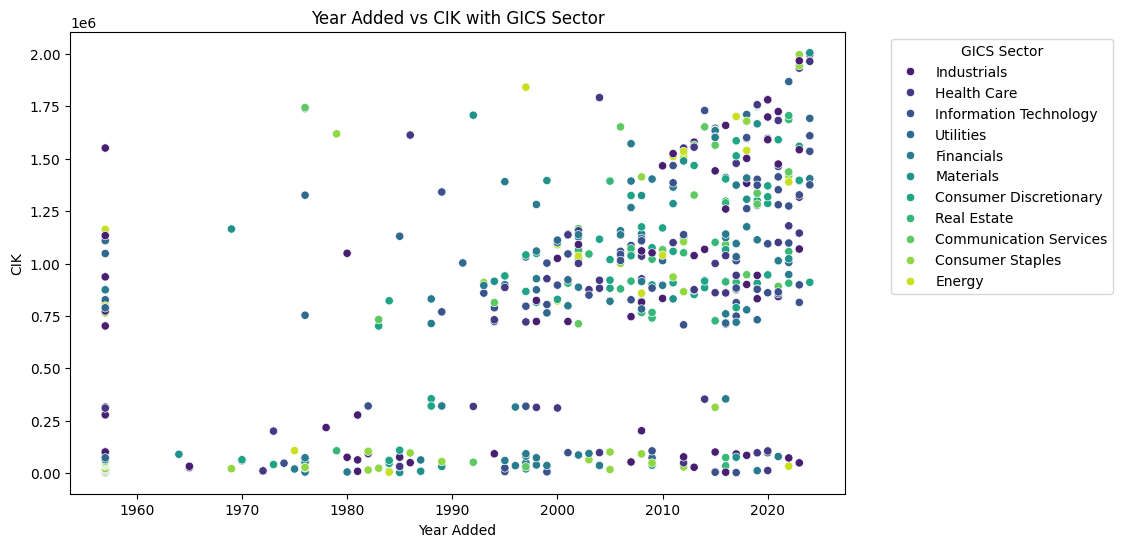

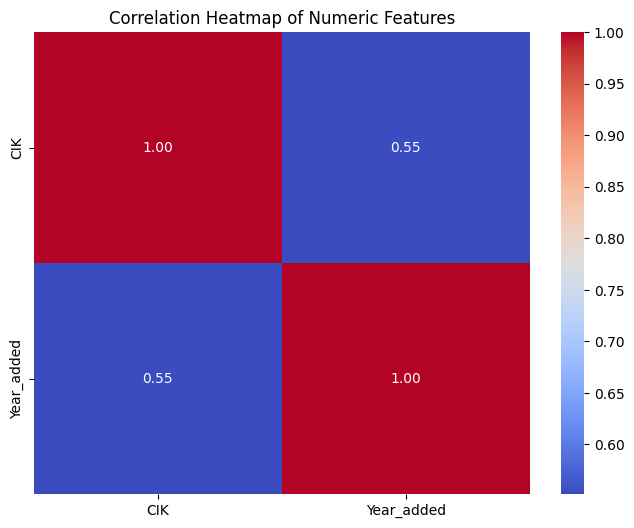

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Univariate Analysis
# Plotting the frequency of GICS Sectors
plt.figure(figsize=(10, 6))
dataset['GICS Sector'].value_counts().plot(kind='bar', color='skyblue', title='Frequency of GICS Sectors')
plt.ylabel('Count')
plt.xlabel('GICS Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Bivariate Analysis
# Analyzing the relationship between CIK and Year added
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Year_added', y='CIK', hue='GICS Sector', palette='viridis')
plt.title('Year Added vs CIK with GICS Sector')
plt.xlabel('Year Added')
plt.ylabel('CIK')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Multivariate Analysis
# Correlation Heatmap of numeric features
numeric_features = dataset.select_dtypes(include=np.number)  # Select numeric columns
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [ ]:
# Check if a date/time column exists
if 'date' not in dataset.columns:
    # Simulate a date column
    dataset['date'] = pd.date_range(start='2020-01-01', periods=len(dataset), freq='M')

# Set the 'date' column as the index
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)

# Preview the dataset
print(dataset.head())

           Symbol             Security             GICS Sector  \
date                                                             
2020-01-31    MMM                   3M             Industrials   
2020-02-29    AOS          A. O. Smith             Industrials   
2020-03-31    ABT  Abbott Laboratories             Health Care   
2020-04-30   ABBV               AbbVie             Health Care   
2020-05-31    ACN            Accenture  Information Technology   

                         GICS Sub-Industry    Headquarters Location  \
date                                                                  
2020-01-31        Industrial Conglomerates    Saint Paul, Minnesota   
2020-02-29               Building Products     Milwaukee, Wisconsin   
2020-03-31           Health Care Equipment  North Chicago, Illinois   
2020-04-30                   Biotechnology  North Chicago, Illinois   
2020-05-31  IT Consulting & Other Services          Dublin, Ireland   

            Date added      CIK      Fo

<ipython-input-6-285df2b8dd5a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataset['date'] = pd.date_range(start='2020-01-01', periods=len(dataset), freq='M')


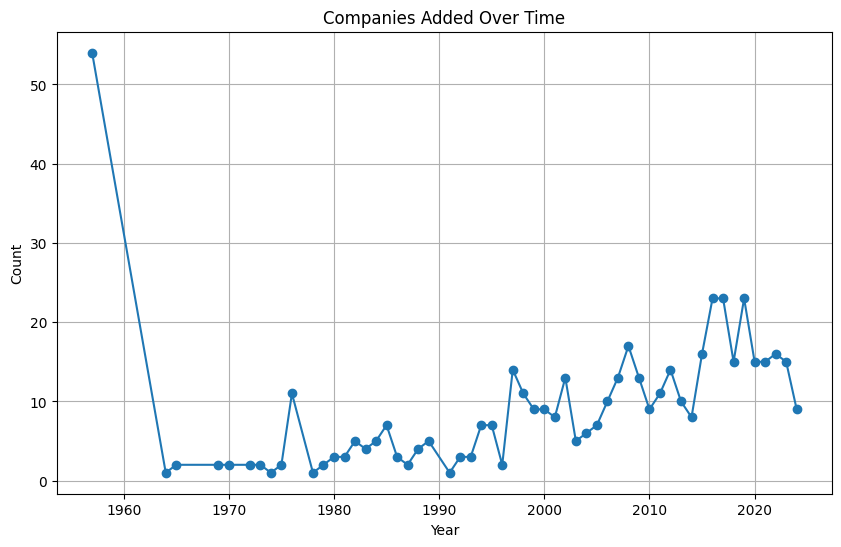

In [ ]:
# Visualize a time-series-like feature: Count of companies added over years
plt.figure(figsize=(10, 6))
dataset['Year_added'].value_counts().sort_index().plot(kind='line', marker='o', title='Companies Added Over Time', ylabel='Count', xlabel='Year')
plt.grid()
plt.show()

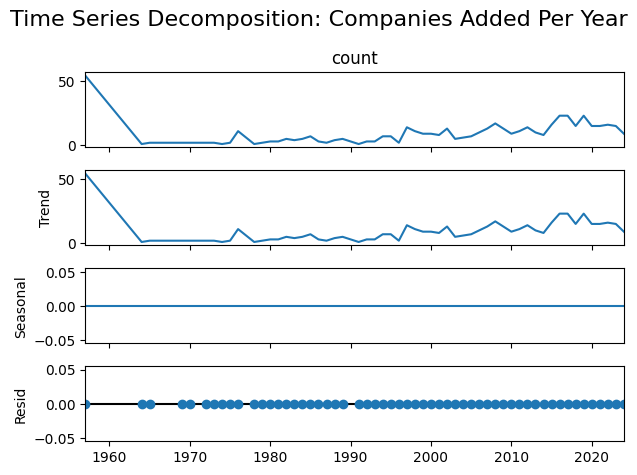

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Create a time series: Count of companies added per year
time_series = dataset['Year_added'].value_counts().sort_index()
time_series.index = pd.to_datetime(time_series.index, format='%Y')  # Convert year to datetime index

# Decompose the time series
result = seasonal_decompose(time_series, model='additive', period=1)  # Period=1 for yearly data

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition: Companies Added Per Year', fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-9-5d0c9f1af4f5>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = dataset.resample('M').size()


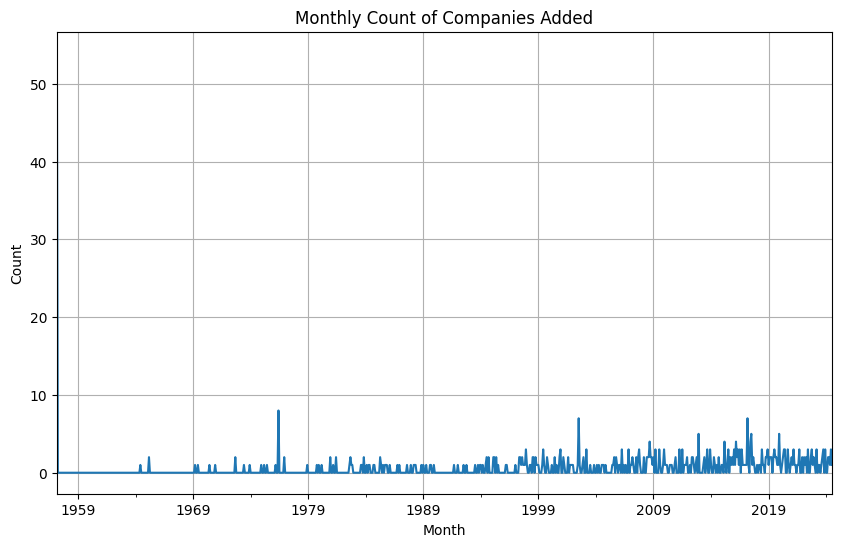

In [ ]:
# Convert 'Date added' to datetime format for resampling
dataset['Date added'] = pd.to_datetime(dataset['Date added'])

# Set 'Date added' as the index for resampling
dataset.set_index('Date added', inplace=True)

# Resample data to monthly counts of companies added
monthly_counts = dataset.resample('M').size()

# Visualize resampled data
plt.figure(figsize=(10, 6))
monthly_counts.plot(title='Monthly Count of Companies Added', ylabel='Count')
plt.xlabel('Month')
plt.grid()
plt.show()

# Reset index if needed for further analysis
dataset.reset_index(inplace=True)


<ipython-input-10-d0ff9ec05aaa>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = dataset.resample('M').size()


<Figure size 1000x600 with 0 Axes>

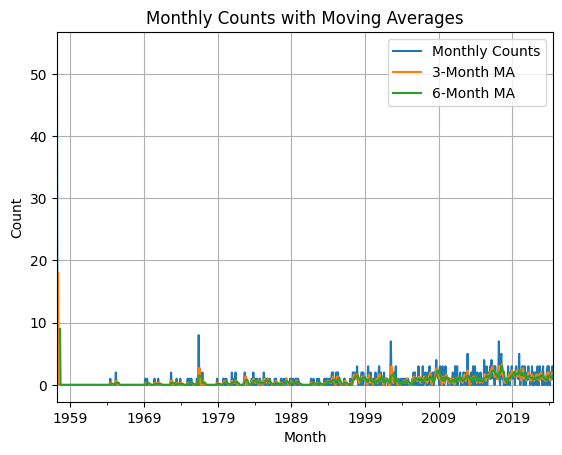

In [ ]:
# Convert 'Date added' to datetime and set as index for time-series analysis
dataset['Date added'] = pd.to_datetime(dataset['Date added'])
dataset.set_index('Date added', inplace=True)

# Resample data to monthly counts of companies added
monthly_counts = dataset.resample('M').size()

# Calculate moving averages
monthly_counts_MA_3 = monthly_counts.rolling(window=3).mean()  # 3-month moving average
monthly_counts_MA_6 = monthly_counts.rolling(window=6).mean()  # 6-month moving average

# Combine into a DataFrame for easier plotting
moving_averages = pd.DataFrame({
    'Monthly Counts': monthly_counts,
    '3-Month MA': monthly_counts_MA_3,
    '6-Month MA': monthly_counts_MA_6
})

# Plot moving averages
plt.figure(figsize=(10, 6))
moving_averages.plot(title='Monthly Counts with Moving Averages', ylabel='Count')
plt.xlabel('Month')
plt.grid()
plt.show()

# Reset index if needed for further analysis
dataset.reset_index(inplace=True)


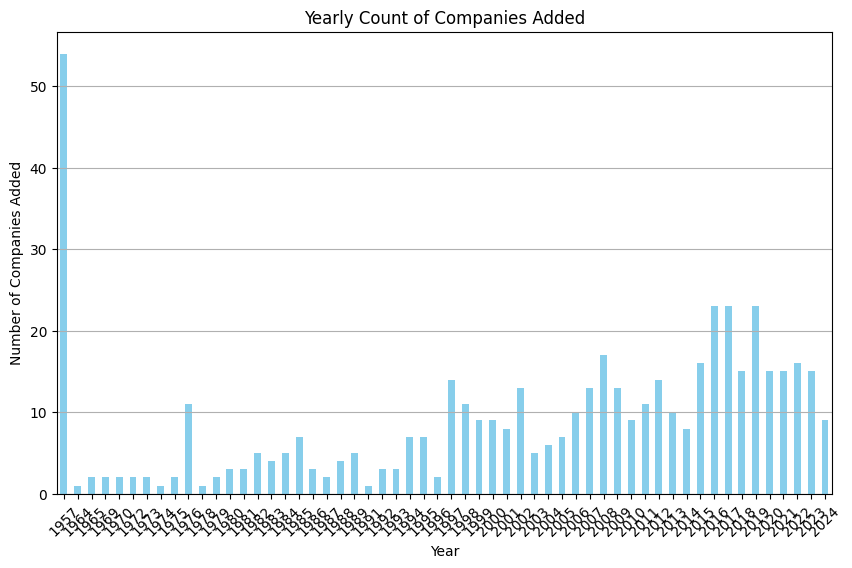

In [ ]:
# Convert 'Date added' to datetime format
dataset['Date added'] = pd.to_datetime(dataset['Date added'])

# Group data by year and calculate the count of companies added each year
yearly_counts = dataset['Date added'].dt.year.value_counts().sort_index()

# Plot yearly counts
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue', title='Yearly Count of Companies Added')
plt.xlabel('Year')
plt.ylabel('Number of Companies Added')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Module 4: Data Summarization and Visualization

Tasks: Statistical Summaries and Visualizations

                          Date added           CIK   Year_added     cluster  \
count                            503  5.030000e+02   503.000000  503.000000   
mean   2001-06-01 20:13:50.218687872  8.217536e+05  2000.914513    0.942346   
min              1957-03-04 00:00:00  1.800000e+03  1957.000000    0.000000   
25%              1992-08-16 00:00:00  1.005050e+05  1992.000000    1.000000   
50%              2008-03-31 00:00:00  9.000750e+05  2008.000000    1.000000   
75%              2017-03-16 12:00:00  1.175188e+06  2017.000000    1.000000   
max              2024-07-08 00:00:00  2.005951e+06  2024.000000    2.000000   
std                              NaN  5.665200e+05    20.179539    0.594343   

       spectral_cluster  text_cluster          PCA1        PCA2  
count        503.000000    503.000000  5.030000e+02  503.000000  
mean           0.429423      0.437376  3.178372e-17    0.000000  
min            0.000000      0.000000 -2.564782e+00   -1.740270  
25%            0.000000 

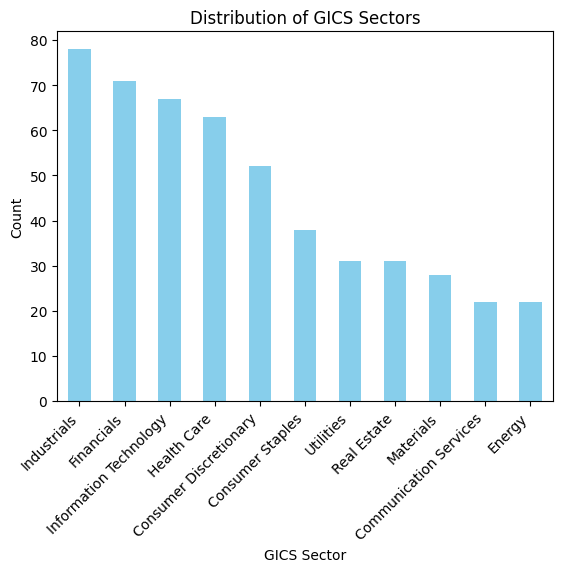

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Statistical summary for the dataset
print(dataset.describe())

# Calculate skewness and kurtosis for numeric features
numeric_features = dataset.select_dtypes(include=np.number)
skewness = numeric_features.skew()
kurtosis = numeric_features.kurt()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# Bar plot: Distribution of GICS Sectors
dataset['GICS Sector'].value_counts().plot(kind='bar', color='skyblue', title='Distribution of GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()




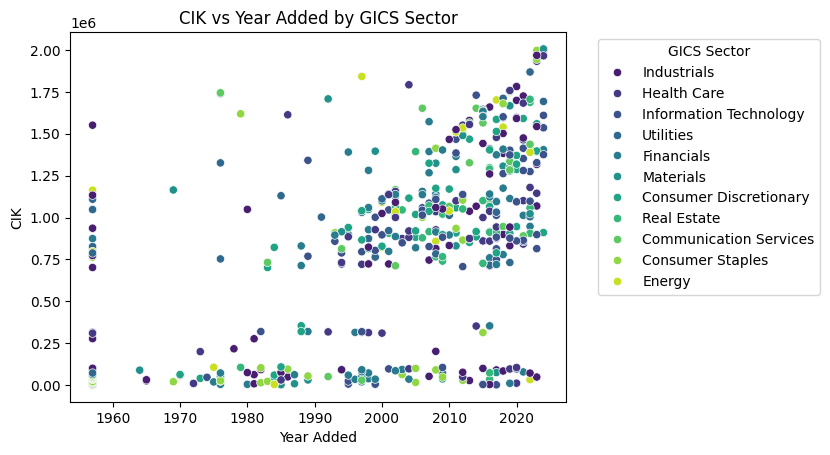

In [40]:
# Scatter plot: CIK vs Year_added (or any numeric variables you prefer)
sns.scatterplot(data=dataset, x='Year_added', y='CIK', hue='GICS Sector', palette='viridis')
plt.title('CIK vs Year Added by GICS Sector')
plt.xlabel('Year Added')
plt.ylabel('CIK')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Module 5: Clustering Algorithms

1.K-Means Clustering

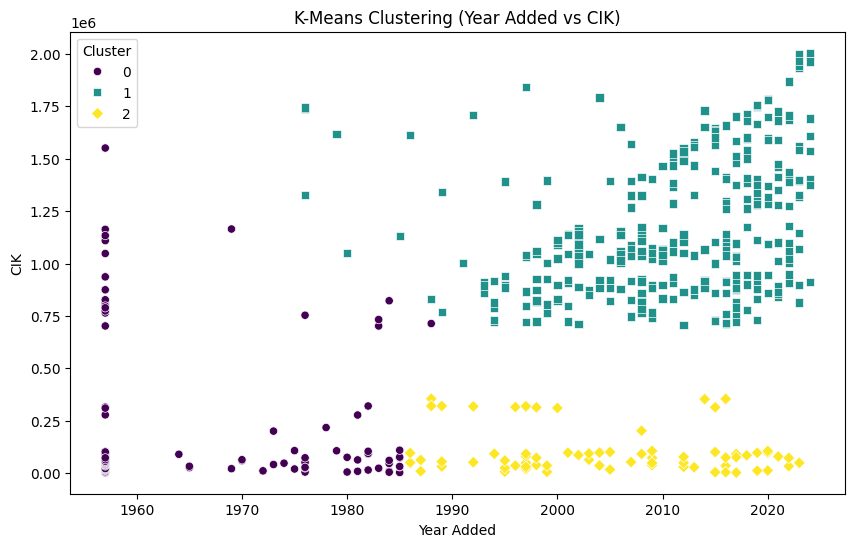

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features for clustering
# For clustering, let's use 'Year_added' and 'CIK' as examples
features = dataset[['Year_added', 'CIK']].dropna()

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
dataset['cluster'] = clusters

# Visualizing Clusters: Use 'Year_added' and 'CIK' for scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Year_added', y='CIK', hue='cluster', palette='viridis', style='cluster', markers=['o', 's', 'D'])
plt.title('K-Means Clustering (Year Added vs CIK)')
plt.xlabel('Year Added')
plt.ylabel('CIK')
plt.legend(title='Cluster')
plt.show()



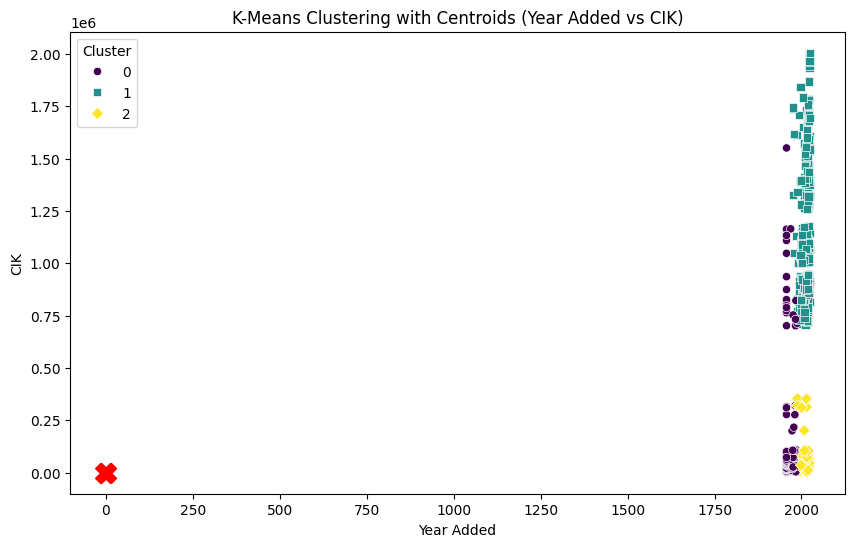

In [42]:
# Plotting with cluster centroids: Assuming Year_added is on the x-axis and CIK on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Year_added', y='CIK', hue='cluster', palette='viridis', style='cluster', markers=['o', 's', 'D'])
centroids = kmeans.cluster_centers_  # Getting the centroids of clusters
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')  # Plot centroids
plt.title('K-Means Clustering with Centroids (Year Added vs CIK)')
plt.xlabel('Year Added')
plt.ylabel('CIK')
plt.legend(title='Cluster')
plt.show()

2. Spectral Clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


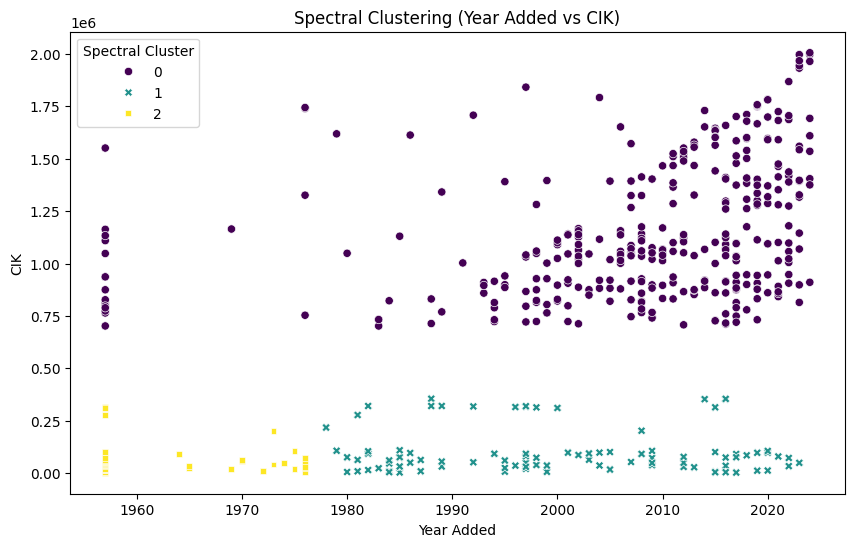

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features for clustering
# Using 'Year_added' and 'CIK' as examples for clustering
features = dataset[['Year_added', 'CIK']].dropna()

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral.fit_predict(scaled_features)
dataset['spectral_cluster'] = spectral_clusters

# Visualize Spectral Clustering: Scatter plot of 'Year_added' vs 'CIK'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Year_added', y='CIK', hue='spectral_cluster', palette='viridis', style='spectral_cluster')
plt.title('Spectral Clustering (Year Added vs CIK)')
plt.xlabel('Year Added')
plt.ylabel('CIK')
plt.legend(title='Spectral Cluster')
plt.show()


3. Document Clustering (Text Clustering)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Replace 'GICS Sector' as the text-like column for clustering
text_data = dataset['GICS Sector'].dropna()

# Convert categorical data to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(text_data)

# Apply K-Means clustering on the text data
kmeans_text = KMeans(n_clusters=3, random_state=42)
text_clusters = kmeans_text.fit_predict(tfidf_matrix)

# Add text clusters to the dataset
dataset['text_cluster'] = text_clusters

# View the dataset with text clusters
print(dataset[['GICS Sector', 'text_cluster']].head())


              GICS Sector  text_cluster
0             Industrials             1
1             Industrials             1
2             Health Care             0
3             Health Care             0
4  Information Technology             0


4. Visualizing Clusters:

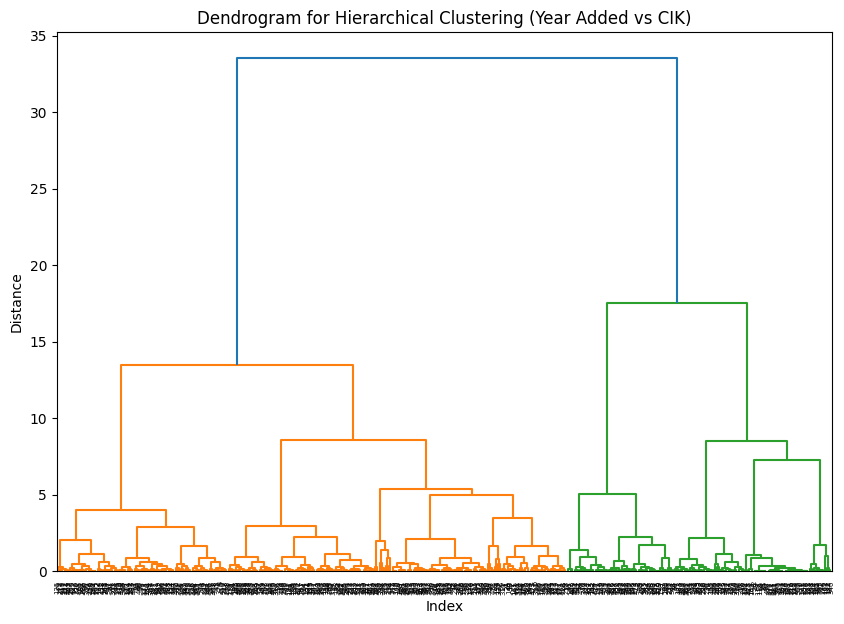

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = dataset[['Year_added', 'CIK']].dropna()

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering using the 'ward' method
Z = linkage(scaled_features, method='ward')

# Create a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering (Year Added vs CIK)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


5. Outlier Detection Using Clustering:

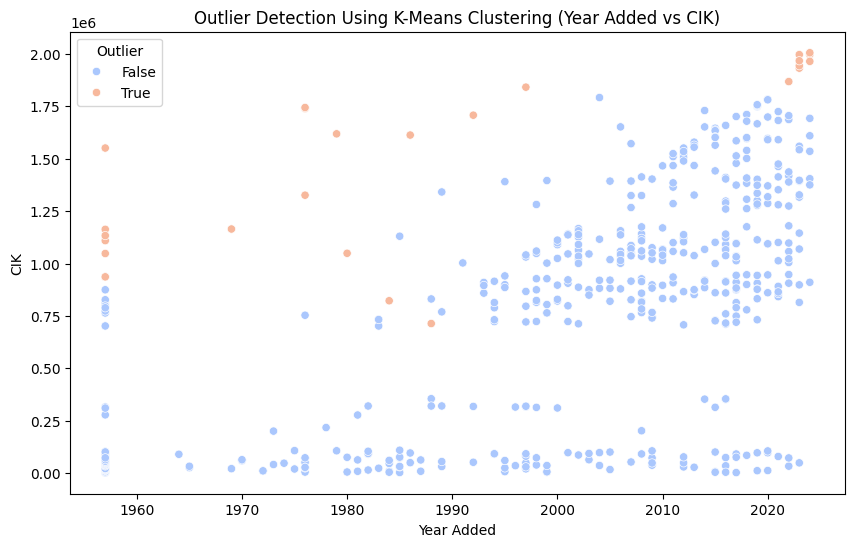

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant features for clustering
features = dataset[['Year_added', 'CIK']].dropna()

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering (assuming kmeans has already been fit to scaled_features)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Calculate the distance of each point to its closest cluster centroid
distances = kmeans.transform(scaled_features)
min_distances = np.min(distances, axis=1)

# Define a threshold for outliers (e.g., points with distance > threshold are outliers)
threshold = np.percentile(min_distances, 95)  # Set threshold at 95th percentile
outliers = min_distances > threshold

# Add outlier information to the dataset
dataset['outlier'] = outliers

# Visualize outliers: Use 'Year_added' and 'CIK' for the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Year_added', y='CIK', hue='outlier', palette='coolwarm')
plt.title('Outlier Detection Using K-Means Clustering (Year Added vs CIK)')
plt.xlabel('Year Added')
plt.ylabel('CIK')
plt.legend(title='Outlier')
plt.show()


Module 6: Dimensionality Reduction

1. Linear Methods

a) Principal Component Analysis (PCA)

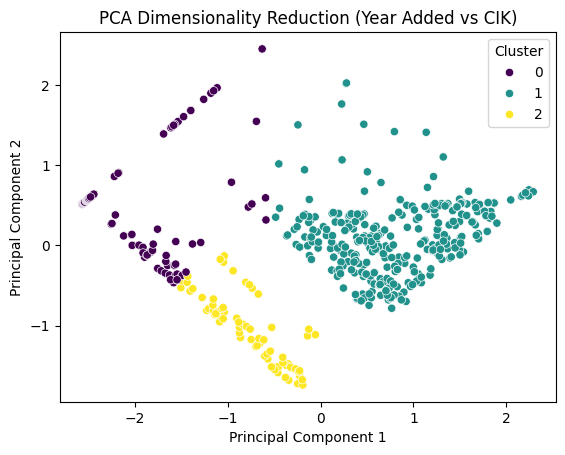

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant features for PCA
features = dataset[['Year_added', 'CIK']].dropna()

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Add PCA results to the dataset
dataset['PCA1'] = pca_features[:, 0]
dataset['PCA2'] = pca_features[:, 1]

# Visualize PCA results
sns.scatterplot(data=dataset, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('PCA Dimensionality Reduction (Year Added vs CIK)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


b) Singular Value Decomposition (SVD)

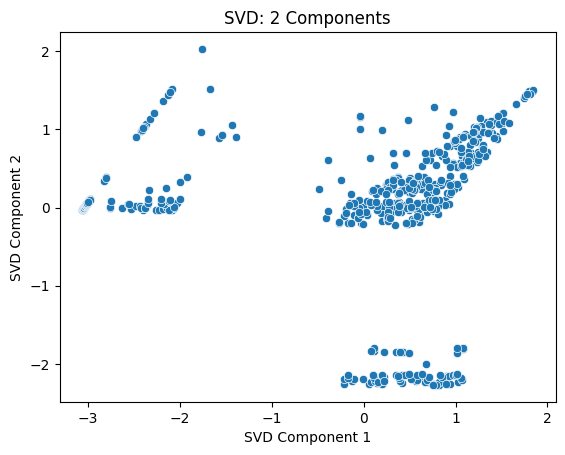

Explained Variance Ratio: [0.61813707 0.3213788 ]


In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for scaling
features_to_scale = dataset.select_dtypes(include=['number']).columns[:3]  # Adjust this to select the columns you want to use
# For example, using 'Year_added' and 'CIK' as numeric features:
# features_to_scale = ['Year_added', 'CIK']

# Extract data to be scaled
data_to_scale = dataset[features_to_scale]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Apply SVD to reduce the dimensionality to 2 components
svd = TruncatedSVD(n_components=2)
svd_components = svd.fit_transform(scaled_data)

# Create a DataFrame for SVD components
svd_df = pd.DataFrame(data=svd_components, columns=['SVD1', 'SVD2'])

# Visualize SVD components
sns.scatterplot(x='SVD1', y='SVD2', data=svd_df)
plt.title('SVD: 2 Components')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()

# Explained Variance Ratio
print(f"Explained Variance Ratio: {svd.explained_variance_ratio_}")


c) Factor Analysis

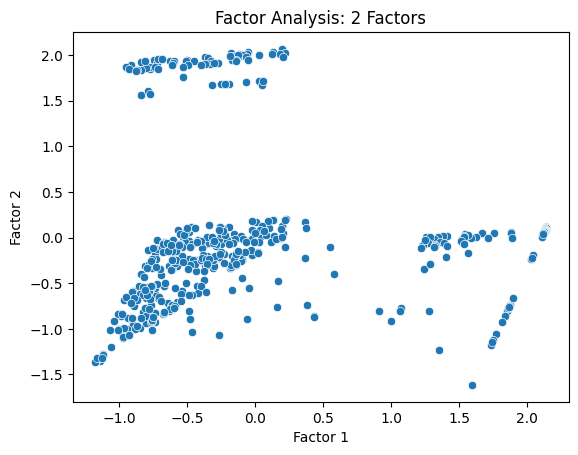

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for scaling
features_to_scale = dataset.select_dtypes(include=['number']).columns[:3]  # Adjust this to select the columns you want to use
# For example, using 'Year_added' and 'CIK' as numeric features:
# features_to_scale = ['Year_added', 'CIK']

# Extract data to be scaled
data_to_scale = dataset[features_to_scale]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Apply Factor Analysis to reduce the dimensionality to 2 components
fa = FactorAnalysis(n_components=2)
fa_components = fa.fit_transform(scaled_data)

# Create a DataFrame for Factor Analysis components
fa_df = pd.DataFrame(data=fa_components, columns=['FA1', 'FA2'])

# Visualize Factor Analysis components
sns.scatterplot(x='FA1', y='FA2', data=fa_df)
plt.title('Factor Analysis: 2 Factors')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()


2. Non-Linear Methods

a) Multidimensional Scaling (MDS)

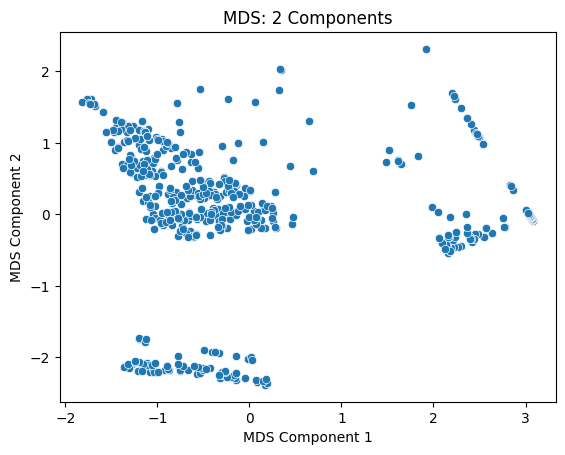

In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for scaling
features_to_scale = dataset.select_dtypes(include=['number']).columns[:3]  # Adjust this to select the columns you want to use
# For example, using 'Year_added' and 'CIK' as numeric features:
# features_to_scale = ['Year_added', 'CIK']

# Extract data to be scaled
data_to_scale = dataset[features_to_scale]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Apply MDS to reduce the dimensionality to 2 components
mds = MDS(n_components=2, random_state=42)
mds_components = mds.fit_transform(scaled_data)

# Create a DataFrame for MDS components
mds_df = pd.DataFrame(data=mds_components, columns=['MDS1', 'MDS2'])

# Visualize MDS components
sns.scatterplot(x='MDS1', y='MDS2', data=mds_df)
plt.title('MDS: 2 Components')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()


b) Manifold Learning

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

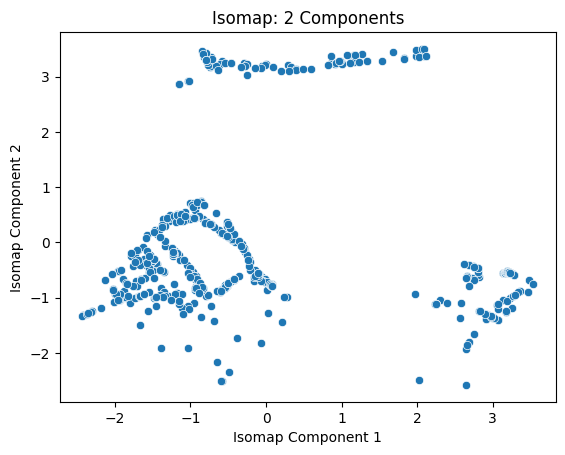

In [ ]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for scaling
features_to_scale = dataset.select_dtypes(include=['number']).columns[:3]  # Adjust this to select the columns you want to use
# For example, you could use columns like:
# features_to_scale = ['Year_added', 'CIK']

# Extract data to be scaled
data_to_scale = dataset[features_to_scale]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Apply Isomap for manifold learning to reduce the dimensionality to 2 components
isomap = Isomap(n_components=2)
isomap_components = isomap.fit_transform(scaled_data)

# Create a DataFrame for Isomap components
isomap_df = pd.DataFrame(data=isomap_components, columns=['Isomap1', 'Isomap2'])

# Visualize Isomap components
sns.scatterplot(x='Isomap1', y='Isomap2', data=isomap_df)
plt.title('Isomap: 2 Components')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.show()


c) Self-Organizing Maps (SOMs)

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=01efe134a528c093cb718ab250ce27240e563e8d373028f8f7467c31390a9ab2
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


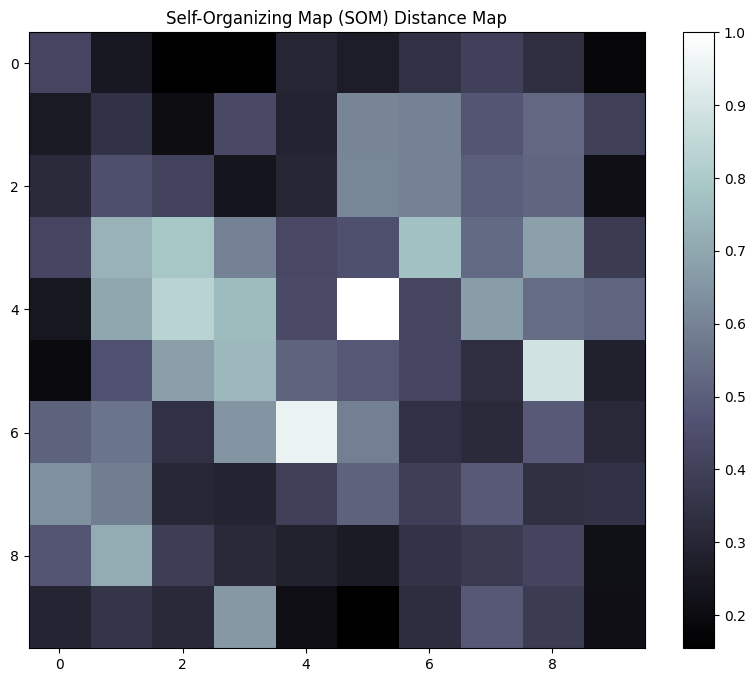

In [ ]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Select numeric columns for scaling
features_to_scale = dataset.select_dtypes(include=['number']).columns[:3]  # Adjust this based on your dataset
# Example: You can specify certain columns like ['Year_added', 'CIK'] for scaling.
data_to_scale = dataset[features_to_scale]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Apply SOM
som = MiniSom(x=10, y=10, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 100)

# Visualize SOM results
plt.figure(figsize=(10, 8))
plt.imshow(som.distance_map().T, cmap='bone')
plt.colorbar()
plt.title('Self-Organizing Map (SOM) Distance Map')
plt.show()


Module 7: Model Development and Evaluation

Tasks: Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Copy the dataset for processing
data = dataset.copy()

# Encode categorical features into numerical values
label_encoder_sector = LabelEncoder()
label_encoder_subindustry = LabelEncoder()

data['GICS Sector'] = label_encoder_sector.fit_transform(data['GICS Sector'])
data['GICS Sub-Industry'] = label_encoder_subindustry.fit_transform(data['GICS Sub-Industry'])

# Extract numerical features and target variable
# Feature columns: GICS Sector, GICS Sub-Industry
# Target variable: Founded year (converted to numerical)
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')  # Handle non-numeric values
data = data.dropna(subset=['Founded'])  # Drop rows with NaN in the target variable

X = data[['GICS Sector', 'GICS Sub-Industry']]
y = data['Founded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R² Score: -0.017683684588641002
Mean Squared Error (MSE): 2137.4014249710744


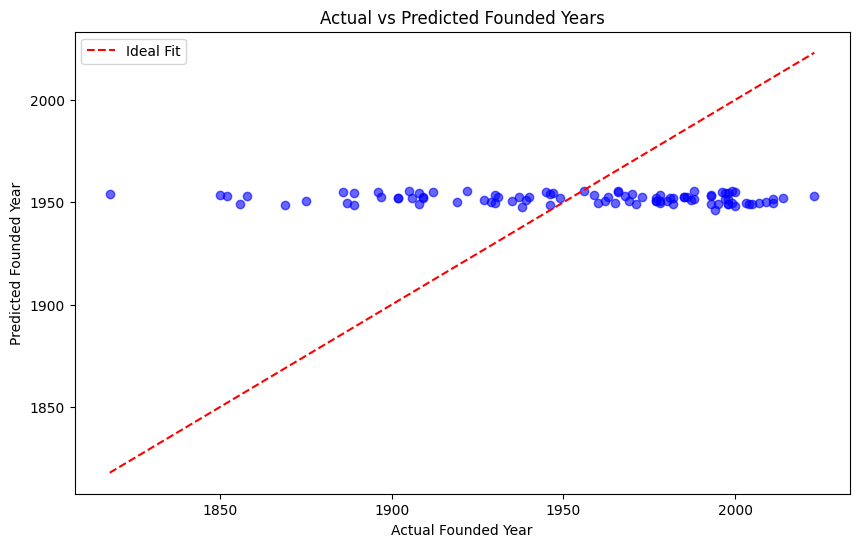

R² Score: -0.017683684588641002
Mean Squared Error (MSE): 2137.4014249710744


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the dataset for processing
data = dataset.copy()

# Encode categorical features
label_encoder_sector = LabelEncoder()
label_encoder_subindustry = LabelEncoder()

data['GICS Sector'] = label_encoder_sector.fit_transform(data['GICS Sector'])
data['GICS Sub-Industry'] = label_encoder_subindustry.fit_transform(data['GICS Sub-Industry'])

# Convert 'Founded' to numeric and drop rows with missing values in the target variable
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')
data = data.dropna(subset=['Founded'])

# Define features and target variable
X = data[['GICS Sector', 'GICS Sub-Industry']]
y = data['Founded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Founded Year")
plt.ylabel("Predicted Founded Year")
plt.title("Actual vs Predicted Founded Years")
plt.legend()
plt.show()

# Print evaluation metrics
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


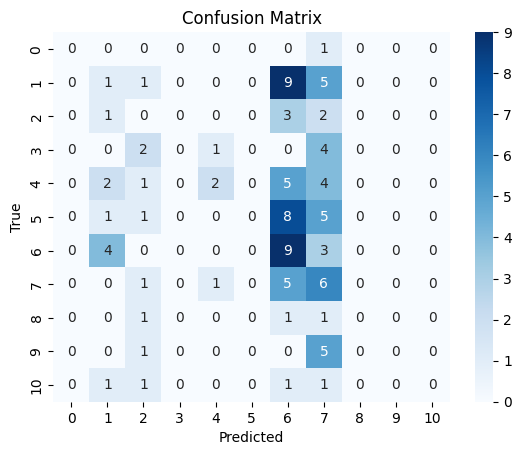

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.10      0.06      0.08        16
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.50      0.14      0.22        14
           5       0.00      0.00      0.00        15
           6       0.22      0.56      0.32        16
           7       0.16      0.46      0.24        13
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         4

    accuracy                           0.18       101
   macro avg       0.09      0.11      0.08       101
weighted avg       0.14      0.18      0.12       101

Accuracy: 0.18
Precision: 0.14
Recall: 0.18
F1 Score: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Copy the dataset
data = dataset.copy()

# Encode the target variable (GICS Sector)
if data['GICS Sector'].dtype == 'object':
    le = LabelEncoder()
    data['GICS Sector'] = le.fit_transform(data['GICS Sector'])

# Encode other categorical columns (if necessary)
data['GICS Sub-Industry'] = LabelEncoder().fit_transform(data['GICS Sub-Industry'])

# Select features and target variable
X = data.select_dtypes(include=np.number).drop('GICS Sector', axis=1)  # All numeric features except target
y = data['GICS Sector']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ROC Curve (for binary classification)
if len(data['GICS Sector'].unique()) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
